In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string

DATA FACT



In [3]:
#import libraries
import pandas as pd
df = pd.read_csv('hotel-reviews.csv')

In [4]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [5]:
df.shape

(38932, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
User_ID         38932 non-null object
Description     38932 non-null object
Browser_Used    38932 non-null object
Device_Used     38932 non-null object
Is_Response     38932 non-null object
dtypes: object(5)
memory usage: 1.5+ MB


In [7]:
df.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id22042,1
Description,38932,38932,"Friendly, helpful, and respectful staff. The r...",1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


DATA CLEANING /EDA


In [8]:
#check missing value
count = df.isnull().sum().sort_values(ascending = False)
percentage = ((df.isnull().sum()/len(df))*100).sort_values(ascending=False)
missing_data = pd.concat([count,percentage],axis=1,keys =['Count','Percentage'])
print("Count and Percentage of missing value in data set is :")
missing_data

Count and Percentage of missing value in data set is :


,Count,Percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


percentage for deafult 
happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


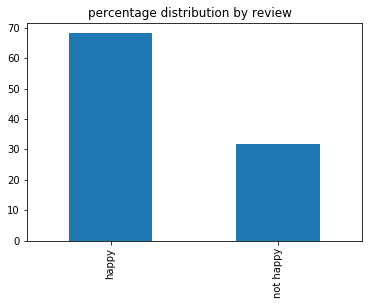

In [9]:
#Checking for distribution for default 
print("percentage for deafult ")
print(round(df.Is_Response.value_counts(normalize=True)*100,2))
round(df.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('percentage distribution by review  ')
plt.show()



In [10]:
#removing unneccessary columd
df.drop(columns=['User_ID','Browser_Used','Device_Used'],inplace =True )
 

In [11]:
df

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy
...,...,...
38927,We arrived late at night and walked in to a ch...,happy
38928,The only positive impression is location and p...,not happy
38929,Traveling with friends for shopping and a show...,not happy
38930,The experience was just ok. We paid extra for ...,not happy


In [12]:
#covert to lower case,remove numbers ,punctuations and brackets
def clean_text1(text):
    text =text.lower()
    text=re.sub('\[.*?\]',' ',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),' ',text) 
    text=re.sub('\w*\d\w','',text)
    return text


cleaned_data = lambda x : clean_text1(x)

In [13]:
cleaned_data

<function __main__.<lambda>(x)>

In [14]:
df['Cleaned_data'] = pd.DataFrame(df.Description.apply(cleaned_data))

In [15]:
df.head()

,Description,Is_Response,Cleaned_data
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april ...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...


In [16]:
def clean_text2(text):
    text =text.lower()
    text=re.sub('[,""...]',' ',text)
    text=re.sub('\n','',text)
    return text


cleaned_data2 = lambda x : clean_text2(x)

In [17]:
df['Cleaned_discription'] = pd.DataFrame(df.Description.apply(cleaned_data2))

In [19]:
df

,Description,Is_Response,Cleaned_data,Cleaned_discription
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april ...,i stayed at the crown plaza april -- - april -...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
...,...,...,...,...
38927,We arrived late at night and walked in to a ch...,happy,we arrived late at night and walked in to a ch...,we arrived late at night and walked in to a ch...
38928,The only positive impression is location and p...,not happy,the only positive impression is location and p...,the only positive impression is location and p...
38929,Traveling with friends for shopping and a show...,not happy,traveling with friends for shopping and a show...,traveling with friends for shopping and a show...
38930,The experience was just ok. We paid extra for ...,not happy,the experience was just ok we paid extra for ...,the experience was just ok we paid extra for ...


Model Deployment

In [21]:
from sklearn.model_selection import train_test_split


In [25]:
x = df.Cleaned_discription #independent variable
y = df.Is_Response

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.1,random_state =225)
print('X_train:',len(X_train))
print('Y_train:',len(Y_train))
print('X_test:',len(X_test))
print('Y_test:',len(Y_test))


X_train: 35038
Y_train: 35038
X_test: 3894
Y_test: 3894


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,recall_score

In [56]:
tvid = TfidfVectorizer()
lr = LogisticRegression()

In [58]:
model =Pipeline([('vectorizer',tvid),('classifier',lr)])
model.fit(X_train,Y_train)
prediction = model.predict(X_test)
confusion_matrix(prediction,Y_test)

array([[2411,  299],
       [ 160, 1024]])

# MODEL PREDICTION

In [62]:
print("Accuracy: ",accuracy_score(prediction,Y_test))
print("Precision: ",precision_score(prediction,Y_test,average='weighted'))
print("Confusion: ",recall_score(prediction,Y_test,average='weighted'))

Accuracy:  0.8821263482280431
Precision:  0.8879722340826498
Confusion:  0.8821263482280431


# TRYING NEW REVIEW 

In [69]:
example = ["I'm happy"]
result = model.predict(example)
print(result)

['happy']
